In [2]:
import os
import matplotlib.pyplot as plt

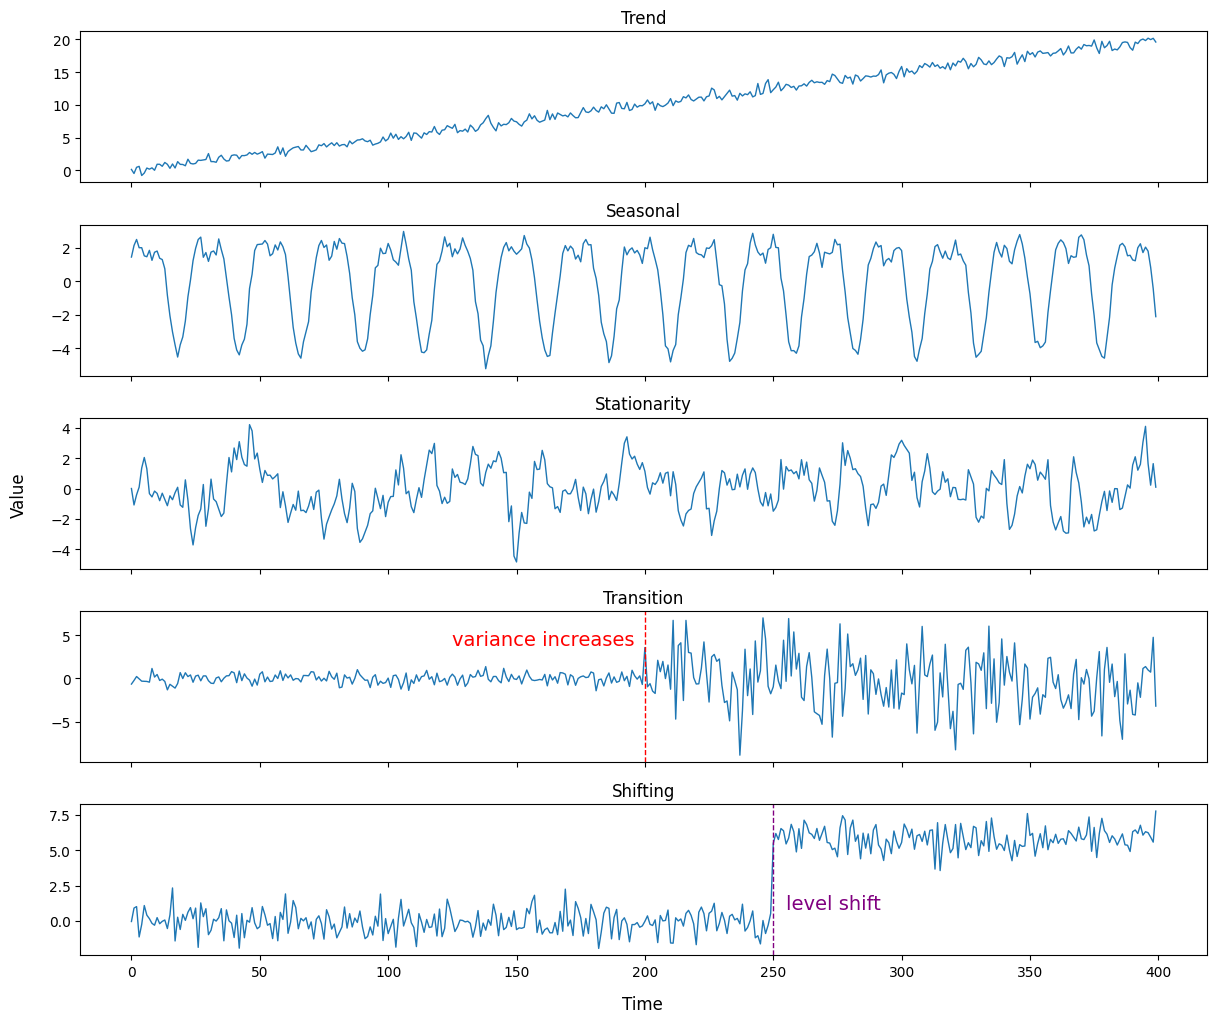

In [10]:
# Synthetic time series examples: trend, seasonality, stationarity (AR1), transition (variance change), shifting (level shift)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

T = 400
t = np.arange(T)
rng = np.random.default_rng(42)

# 1) Trend: linear + small noise
trend = 0.05 * t + rng.normal(scale=0.5, size=T)

# 2) Seasonality: strong yearly/periodic component
seasonal = 3.0 * np.sin(2 * np.pi * t / 24) + 1.5 * np.cos(2 * np.pi * t / 12) + rng.normal(scale=0.3, size=T)

# 3) Stationary: AR(1) with |phi|<1
phi = 0.7
eps = rng.normal(scale=1.0, size=T)
ar1 = np.zeros(T)
for i in range(1, T):
    ar1[i] = phi * ar1[i-1] + eps[i]

# 4) Transition: low-variance then high-variance
transition = np.empty(T)
transition[:200] = rng.normal(scale=0.5, size=200)
transition[200:] = rng.normal(scale=3.0, size=T-200)

# 5) Shifting: level shift at t=250
shift = rng.normal(scale=0.8, size=T)
shift[250:] += 6.0

series = pd.DataFrame({
    'trend': trend,
    'seasonal': seasonal,
    'stationary_ar1': ar1,
    'transition_var': transition,
    'shifting_level': shift
}, index=t)

# Plot all series as stacked subplots (one subplot per series)
os.makedirs('/home/hwkang/SeqSNN/outputs', exist_ok=True)
fig, axes = plt.subplots(5, 1, figsize=(12, 10), sharex=True)
title_map = {
    'stationary_ar1': 'Stationarity',
    'transition_var': 'Transition',
    'shifting_level': 'Shifting'
}
for i, col in enumerate(series.columns):
    ax = axes[i]
    ax.plot(series.index, series[col], lw=1)
    ax.set_title(title_map.get(col, col.replace('_', ' ').title()))
    ax.grid(False)
    # mark interesting boundaries
    if col == 'transition_var':
        ax.axvline(200, color='red', linestyle='--', lw=1)
        ax.text(125, ax.get_ylim()[1] * 0.5, 'variance increases', color='red', fontsize=14)
    if col == 'shifting_level':
        ax.axvline(250, color='purple', linestyle='--', lw=1)
        ax.text(255, ax.get_ylim()[1] * 0.1, 'level shift', color='purple', fontsize=14)

# Set shared labels
#axes[-1].set_xlabel('Time', fontsize=12)  # Only bottom subplot gets X label
fig.text(0.5, -0.01, 'Time', va='center', rotation='horizontal', fontsize=12)  # Single Y label on left
fig.text(-0.01, 0.5, 'Value', va='center', rotation='vertical', fontsize=12)  # Single Y label on left

plt.tight_layout()
out_path = '/home/hwkang/SeqSNN/outputs/syn_ts_subplots.svg'
plt.savefig(out_path, format='svg', bbox_inches='tight')
plt.show()